In [40]:
from minisom import MiniSom
import pandas as pd

In [41]:
base = pd.read_csv('wines.csv')

In [42]:
x = base.iloc[:,1:14].values
y = base.iloc[:,0].values #Tipos de Agrupamento

In [43]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [44]:
def calcularDimensaoMatriz(tamanho_treinamento):
    import math
    tamanho_matriz = 5*math.sqrt(tamanho_treinamento)
    dimensao_matriz = math.sqrt(tamanho_matriz)
    return math.floor(dimensao_matriz)

In [45]:
matriz_t = calcularDimensaoMatriz(X.shape[0])

som = MiniSom(x = matriz_t, y = matriz_t, input_len= X.shape[1], sigma = 1.0, learning_rate=0.5, random_seed= 2) 
#Se baseia na matriz da camada interna/ sigma = raio do BMU; input_len= numero de classes/grupos
som.random_weights_init(X)
som.train_random(data= X, num_iteration=100) # num_iteration= epochs

In [ ]:
som._weights #pesos
som._activation_distance #mapas auto organizáveis
som.activation_response(X) #quantas vezes o neuronio foi selecionado com BMU

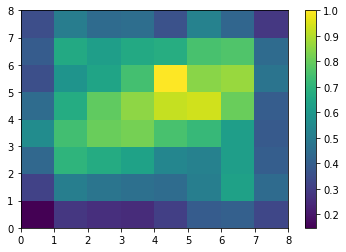

In [47]:
from pylab import pcolor, colorbar,plot
pcolor(som.distance_map().T) #Matriz transposta - Calcula o MID (Mean Inter Neuron Distance) de cada neurônio a sua volta
colorbar()

In [48]:
neuronio_bmu = som.winner(X[2]) #coordenada do bmu
marcadores = ['o', 's', 'D']
cores = ['r','g','b']
y[y==1] = 0
y[y==2] = 1
y[y==3] = 2

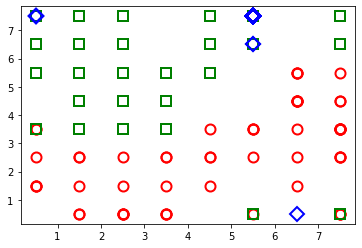

In [49]:
for i,x in enumerate(X):
    neuronio_bmu = som.winner(x)
    plot(neuronio_bmu[0] + 0.5, 
         neuronio_bmu[1]+ 0.5, 
         marcadores[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgecolor = cores[y[i]], 
         markeredgewidth = 2)
 